In [50]:
import pandas as pd

In [51]:
df = pd.read_csv('tweet obama.csv')
df.head()

,created_at,text,url,replies,retweets,favorites,user
0,10/16/17 22:59,I'm grateful to @SenJohnMcCain for his lifetim...,https://twitter.com/BarackObama/status/9200615...,17064,89916,641842,BarackObama
1,10/2/17 12:41,Michelle &amp; I are praying for the victims i...,https://twitter.com/BarackObama/status/9148326...,21588,405895,1715753,BarackObama
2,9/30/17 2:22,Proud to cheer on Team USA at the Invictus Gam...,https://twitter.com/BarackObama/status/9139520...,8476,60651,503255,BarackObama
3,9/26/17 17:03,We're expanding our efforts to help Puerto Ric...,https://twitter.com/BarackObama/status/9127244...,10657,113807,334901,BarackObama
4,9/25/17 23:36,"Prosecutor, soldier, family man, citizen. Beau...",https://twitter.com/BarackObama/status/9124608...,3886,58449,328106,BarackObama


### Data Preprocessing

In [52]:
# drop unnecessary columns

df = df.drop(['created_at', 'url', 'user', 'replies', 'retweets', 'favorites'], axis=1)
df.head()

,text
0,I'm grateful to @SenJohnMcCain for his lifetim...
1,Michelle &amp; I are praying for the victims i...
2,Proud to cheer on Team USA at the Invictus Gam...
3,We're expanding our efforts to help Puerto Ric...
4,"Prosecutor, soldier, family man, citizen. Beau..."


In [53]:
# check null values

df.isnull().sum()

text    0
dtype: int64

In [54]:
df.shape

(3207, 1)

In [6]:
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

def clean_text(text):
  
    text = re.sub(r'http\S+', '', text)  # URL
    text = re.sub(r'@\w+', '', text)  # Mentions
    if re.search(r'<[^>]+>', text):
        text = BeautifulSoup(text, 'html.parser').get_text()  # HTML tags
    text = re.sub(r'\[.*?\]|\{.*?\}', '', text) # Brackets
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Special character & Punctuation
    
    text = text.lower() # Convert lowercase
    
    tokens = nltk.word_tokenize(text) # tokenize text
    
    # Remove stopwords 
    stop_words = set(stopwords.words('english'))
    custom_stopwords = set(['https', 'http'])  # custom stopwords 
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in custom_stopwords]
    
    # Join filtered tokens back into a cleaned text
    cleaned_text = ' '.join(filtered_tokens)
    
    return cleaned_text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

In [7]:
df.head()

,text,replies,retweets,favorites,cleaned_text
0,I'm grateful to @SenJohnMcCain for his lifetim...,17064,89916,641842,im grateful lifetime service country congratul...
1,Michelle &amp; I are praying for the victims i...,21588,405895,1715753,michelle amp praying victims las vegas thought...
2,Proud to cheer on Team USA at the Invictus Gam...,8476,60651,503255,proud cheer team usa invictus games today frie...
3,We're expanding our efforts to help Puerto Ric...,10657,113807,334901,expanding efforts help puerto rico amp usvi fe...
4,"Prosecutor, soldier, family man, citizen. Beau...",3886,58449,328106,prosecutor soldier family man citizen beau mad...


In [8]:
from nltk.tokenize import word_tokenize

df['tokenize_text'] = df['cleaned_text'].apply(word_tokenize)

In [9]:
df['rmv_infrequent'] = df['tokenize_text'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df.head()

,text,replies,retweets,favorites,cleaned_text,tokenize_text,rmv_infrequent
0,I'm grateful to @SenJohnMcCain for his lifetim...,17064,89916,641842,im grateful lifetime service country congratul...,"[im, grateful, lifetime, service, country, con...",grateful lifetime service country congratulati...
1,Michelle &amp; I are praying for the victims i...,21588,405895,1715753,michelle amp praying victims las vegas thought...,"[michelle, amp, praying, victims, las, vegas, ...",michelle amp praying victims las vegas thought...
2,Proud to cheer on Team USA at the Invictus Gam...,8476,60651,503255,proud cheer team usa invictus games today frie...,"[proud, cheer, team, usa, invictus, games, tod...",proud cheer team usa invictus games today frie...
3,We're expanding our efforts to help Puerto Ric...,10657,113807,334901,expanding efforts help puerto rico amp usvi fe...,"[expanding, efforts, help, puerto, rico, amp, ...",expanding efforts help puerto rico amp usvi fe...
4,"Prosecutor, soldier, family man, citizen. Beau...",3886,58449,328106,prosecutor soldier family man citizen beau mad...,"[prosecutor, soldier, family, man, citizen, be...",prosecutor soldier family man citizen beau mad...


In [10]:
all_words = ' '.join([word for word in df['rmv_infrequent']])

In [11]:
tokenize = nltk.tokenize.word_tokenize(all_words)

In [12]:
from nltk.probability import FreqDist

frequency = FreqDist(tokenize)
frequency

FreqDist({'president': 1209, 'obama': 1069, 'actonclimate': 294, 'change': 215, 'watch': 207, 'climate': 201, 'time': 171, 'health': 170, 'americans': 158, 'today': 155, ...})

In [16]:
most_common = frequency.most_common(5)
most_common

[('president', 1209),
 ('obama', 1069),
 ('actonclimate', 294),
 ('change', 215),
 ('watch', 207)]

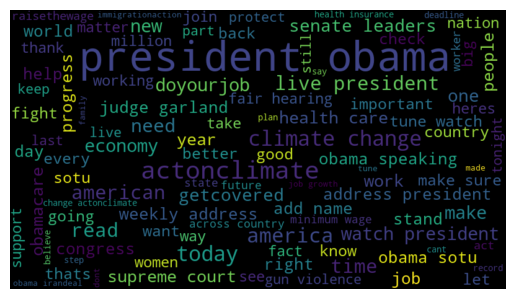

In [45]:
import wordcloud
import matplotlib.pyplot as plt

wc = wordcloud.WordCloud(background_color="black", max_words=100, height=450, width=800)
wc.generate(all_words)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
df['drop_words'] = df['tokenize_text'].apply(lambda x: ' '.join(word for word in x if frequency[word]>3))

In [14]:
df.head()

,text,replies,retweets,favorites,cleaned_text,tokenize_text,rmv_infrequent,drop_words
0,I'm grateful to @SenJohnMcCain for his lifetim...,17064,89916,641842,im grateful lifetime service country congratul...,"[im, grateful, lifetime, service, country, con...",grateful lifetime service country congratulati...,grateful service country congratulations john ...
1,Michelle &amp; I are praying for the victims i...,21588,405895,1715753,michelle amp praying victims las vegas thought...,"[michelle, amp, praying, victims, las, vegas, ...",michelle amp praying victims las vegas thought...,michelle amp victims thoughts families amp eve...
2,Proud to cheer on Team USA at the Invictus Gam...,8476,60651,503255,proud cheer team usa invictus games today frie...,"[proud, cheer, team, usa, invictus, games, tod...",proud cheer team usa invictus games today frie...,proud team games today friend joe best country
3,We're expanding our efforts to help Puerto Ric...,10657,113807,334901,expanding efforts help puerto rico amp usvi fe...,"[expanding, efforts, help, puerto, rico, amp, ...",expanding efforts help puerto rico amp usvi fe...,expanding efforts help amp fellow americans ne...
4,"Prosecutor, soldier, family man, citizen. Beau...",3886,58449,328106,prosecutor soldier family man citizen beau mad...,"[prosecutor, soldier, family, man, citizen, be...",prosecutor soldier family man citizen beau mad...,family man citizen beau made want better legac...


In [15]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

df['lemmatize_words'] = df['drop_words'].apply(lemma.lemmatize)
df.head()

,text,replies,retweets,favorites,cleaned_text,tokenize_text,rmv_infrequent,drop_words,lemmatize_words
0,I'm grateful to @SenJohnMcCain for his lifetim...,17064,89916,641842,im grateful lifetime service country congratul...,"[im, grateful, lifetime, service, country, con...",grateful lifetime service country congratulati...,grateful service country congratulations john ...,grateful service country congratulations john ...
1,Michelle &amp; I are praying for the victims i...,21588,405895,1715753,michelle amp praying victims las vegas thought...,"[michelle, amp, praying, victims, las, vegas, ...",michelle amp praying victims las vegas thought...,michelle amp victims thoughts families amp eve...,michelle amp victims thoughts families amp eve...
2,Proud to cheer on Team USA at the Invictus Gam...,8476,60651,503255,proud cheer team usa invictus games today frie...,"[proud, cheer, team, usa, invictus, games, tod...",proud cheer team usa invictus games today frie...,proud team games today friend joe best country,proud team games today friend joe best country
3,We're expanding our efforts to help Puerto Ric...,10657,113807,334901,expanding efforts help puerto rico amp usvi fe...,"[expanding, efforts, help, puerto, rico, amp, ...",expanding efforts help puerto rico amp usvi fe...,expanding efforts help amp fellow americans ne...,expanding efforts help amp fellow americans ne...
4,"Prosecutor, soldier, family man, citizen. Beau...",3886,58449,328106,prosecutor soldier family man citizen beau mad...,"[prosecutor, soldier, family, man, citizen, be...",prosecutor soldier family man citizen beau mad...,family man citizen beau made want better legac...,family man citizen beau made want better legac...


In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()

df['polarity'] = df['lemmatize_words'].apply(lambda x: sentiment_analyzer.polarity_scores(x))
df.head()

,text,replies,retweets,favorites,cleaned_text,tokenize_text,rmv_infrequent,drop_words,lemmatize_words,polarity
0,I'm grateful to @SenJohnMcCain for his lifetim...,17064,89916,641842,im grateful lifetime service country congratul...,"[im, grateful, lifetime, service, country, con...",grateful lifetime service country congratulati...,grateful service country congratulations john ...,grateful service country congratulations john ...,"{'neg': 0.0, 'neu': 0.367, 'pos': 0.633, 'comp..."
1,Michelle &amp; I are praying for the victims i...,21588,405895,1715753,michelle amp praying victims las vegas thought...,"[michelle, amp, praying, victims, las, vegas, ...",michelle amp praying victims las vegas thought...,michelle amp victims thoughts families amp eve...,michelle amp victims thoughts families amp eve...,"{'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'comp..."
2,Proud to cheer on Team USA at the Invictus Gam...,8476,60651,503255,proud cheer team usa invictus games today frie...,"[proud, cheer, team, usa, invictus, games, tod...",proud cheer team usa invictus games today frie...,proud team games today friend joe best country,proud team games today friend joe best country,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp..."
3,We're expanding our efforts to help Puerto Ric...,10657,113807,334901,expanding efforts help puerto rico amp usvi fe...,"[expanding, efforts, help, puerto, rico, amp, ...",expanding efforts help puerto rico amp usvi fe...,expanding efforts help amp fellow americans ne...,expanding efforts help amp fellow americans ne...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp..."
4,"Prosecutor, soldier, family man, citizen. Beau...",3886,58449,328106,prosecutor soldier family man citizen beau mad...,"[prosecutor, soldier, family, man, citizen, be...",prosecutor soldier family man citizen beau mad...,family man citizen beau made want better legac...,family man citizen beau made want better legac...,"{'neg': 0.105, 'neu': 0.526, 'pos': 0.368, 'co..."


In [19]:
df = pd.concat([df.drop(['replies','retweets','favorites'], axis=1),
               df['polarity'].apply(pd.Series)], axis=1)
df.head()

,text,cleaned_text,tokenize_text,rmv_infrequent,drop_words,lemmatize_words,polarity,neg,neu,pos,compound
0,I'm grateful to @SenJohnMcCain for his lifetim...,im grateful lifetime service country congratul...,"[im, grateful, lifetime, service, country, con...",grateful lifetime service country congratulati...,grateful service country congratulations john ...,grateful service country congratulations john ...,"{'neg': 0.0, 'neu': 0.367, 'pos': 0.633, 'comp...",0.000,0.367,0.633,0.7845
1,Michelle &amp; I are praying for the victims i...,michelle amp praying victims las vegas thought...,"[michelle, amp, praying, victims, las, vegas, ...",michelle amp praying victims las vegas thought...,michelle amp victims thoughts families amp eve...,michelle amp victims thoughts families amp eve...,"{'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'comp...",0.247,0.753,0.000,-0.3182
2,Proud to cheer on Team USA at the Invictus Gam...,proud cheer team usa invictus games today frie...,"[proud, cheer, team, usa, invictus, games, tod...",proud cheer team usa invictus games today frie...,proud team games today friend joe best country,proud team games today friend joe best country,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.000,0.323,0.677,0.8885
3,We're expanding our efforts to help Puerto Ric...,expanding efforts help puerto rico amp usvi fe...,"[expanding, efforts, help, puerto, rico, amp, ...",expanding efforts help puerto rico amp usvi fe...,expanding efforts help amp fellow americans ne...,expanding efforts help amp fellow americans ne...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.000,0.588,0.412,0.5994
4,"Prosecutor, soldier, family man, citizen. Beau...",prosecutor soldier family man citizen beau mad...,"[prosecutor, soldier, family, man, citizen, be...",prosecutor soldier family man citizen beau mad...,family man citizen beau made want better legac...,family man citizen beau made want better legac...,"{'neg': 0.105, 'neu': 0.526, 'pos': 0.368, 'co...",0.105,0.526,0.368,0.4588


In [20]:
df['sentiment'] = df['compound'].apply(lambda x: 'Positive' if x>0 else 'Negative' if x<0 else 'Neutral')
df.head()

,text,cleaned_text,tokenize_text,rmv_infrequent,drop_words,lemmatize_words,polarity,neg,neu,pos,compound,sentiment
0,I'm grateful to @SenJohnMcCain for his lifetim...,im grateful lifetime service country congratul...,"[im, grateful, lifetime, service, country, con...",grateful lifetime service country congratulati...,grateful service country congratulations john ...,grateful service country congratulations john ...,"{'neg': 0.0, 'neu': 0.367, 'pos': 0.633, 'comp...",0.000,0.367,0.633,0.7845,Positive
1,Michelle &amp; I are praying for the victims i...,michelle amp praying victims las vegas thought...,"[michelle, amp, praying, victims, las, vegas, ...",michelle amp praying victims las vegas thought...,michelle amp victims thoughts families amp eve...,michelle amp victims thoughts families amp eve...,"{'neg': 0.247, 'neu': 0.753, 'pos': 0.0, 'comp...",0.247,0.753,0.000,-0.3182,Negative
2,Proud to cheer on Team USA at the Invictus Gam...,proud cheer team usa invictus games today frie...,"[proud, cheer, team, usa, invictus, games, tod...",proud cheer team usa invictus games today frie...,proud team games today friend joe best country,proud team games today friend joe best country,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.000,0.323,0.677,0.8885,Positive
3,We're expanding our efforts to help Puerto Ric...,expanding efforts help puerto rico amp usvi fe...,"[expanding, efforts, help, puerto, rico, amp, ...",expanding efforts help puerto rico amp usvi fe...,expanding efforts help amp fellow americans ne...,expanding efforts help amp fellow americans ne...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.000,0.588,0.412,0.5994,Positive
4,"Prosecutor, soldier, family man, citizen. Beau...",prosecutor soldier family man citizen beau mad...,"[prosecutor, soldier, family, man, citizen, be...",prosecutor soldier family man citizen beau mad...,family man citizen beau made want better legac...,family man citizen beau made want better legac...,"{'neg': 0.105, 'neu': 0.526, 'pos': 0.368, 'co...",0.105,0.526,0.368,0.4588,Positive


In [22]:
df['sentiment'].value_counts()

Positive    1695
Neutral     1089
Negative     423
Name: sentiment, dtype: int64